## Import Required Packages

In [3]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from dmba import classificationSummary

## Import Data

In [5]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Preprocessing
1. The "ID" and "ZIP Code" columns are not relevant for model building and therefore should be removed.
2. If a column name has a space, replace the space with an underscore (_)
3. Change the "Education" variable to be type "category". Rename the values (1,2,3) of Education variable to the following:
    1. 1 = "Undergrad"
    2. 2 = "Graduate"
    3. 3 = "Advanced/Professional"
4. Turn the renamed variable to be a dummy variable

In [6]:
# Delete the ID and ZIP code columns
bank_dfv2 = bank_df.drop(columns=['ID', 'ZIP Code'])

# Replace space with underscore in column names
bank_dfv2.columns = bank_dfv2.columns.str.replace(' ', '_')

# Change "Education" column as categorical
bank_dfv2['Education'] = bank_dfv2['Education'].astype('category')

# Rename "Education" values of 1, 2 and 3 to "Undergrad", "Graduate" and "Advanced/ Professional"
new_categories = {1:'Undergrad', 2:'Graduate', 3:'Advanced/Professional'}
bank_dfv2.Education.cat.rename_categories(new_categories, inplace=True)

# Create dummy variables for the categorical data
bank_dfv3 = pd.get_dummies(bank_dfv2, prefix_sep='_', drop_first=True)

## Data Preprocessing
1. Identify dependent and independent variables
2. Split data into training and testing data
    1. 60% training and 40% testing

In [8]:
from sklearn.model_selection import train_test_split

# Identify dependent and independent variables
y = bank_dfv3['Personal_Loan']
X = bank_dfv3.drop(columns=['Personal_Loan'])

# Partition data into training (60%) and testing (40%)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

## Predict "Personal Loans"
1. Fit the discriminant analysis on the training data
2. Print the intercept and model coefficients
3. Get the class predictions and probabilities of the training data

In [13]:
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(train_X, train_y)

# Get the intercept and coefficients of the linear discriminant analysis
da_intercept = da_reg.intercept_[0]
da_coeff = da_reg.coef_[0]

# Print intercept and model coefficients
print('Linear discriminant analysis intercept: ', da_intercept)
print("Linear discriminant analysis variables and their coefficients:")
pd.DataFrame({'coeff': da_coeff}, index=train_X.columns) #DataFrame of variables and coeff

# Get the class predictions of the model, along with its probabilities 
da_train_pred_class = da_reg.predict(train_X)
da_train_pred_prob = da_reg.predict_proba(train_X)

Linear discriminant analysis intercept:  -9.6155496539902
Linear discriminant analysis variables and their coefficients:


## Use linear discriminant analysis on unseen data
1. Use linear discriminant analysis to "score" the testing data
2. Obtain probabilities for the testing data

In [15]:
da_test_pred_class = da_reg.predict(test_X)
da_test_pred_prob = da_reg.predict_proba(test_X)
pred_summary = pd.DataFrame({"Actual_Class": test_y, "Predicted_Class": da_test_pred_class,\
                             "P(Y=0)":da_test_pred_prob[:,0], "P(Y=1)":da_test_pred_prob[:,1]})
pred_summary.head(10)

,Actual_Class,Predicted_Class,P(Y=0),P(Y=1)
2764,0,0,0.990321,0.009679
4767,0,0,0.999951,0.000049
3814,0,0,0.999875,0.000125
3499,0,0,0.998093,0.001907
2735,0,0,0.979256,0.020744
3922,0,0,0.999213,0.000787
2701,0,0,0.998266,0.001734
1179,0,0,0.991035,0.008965
932,0,1,0.091928,0.908072
792,0,0,0.969082,0.030918


## Compare linear discriminant analysis with logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression

# fit a logistic regression
log_reg = LogisticRegression(fit_intercept=True, C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Get the intercept and coefficients of the logistic regression
log_reg_intercept = log_reg.intercept_[0]
log_reg_coeff = log_reg.coef_[0]

# Get the class predictions of the model, along with its probabilities 
log_train_pred_class = log_reg.predict(train_X)
log_train_pred_prob = log_reg.predict_proba(train_X)

# Using logistic regression on unseen data
log_test_pred_class = log_reg.predict(test_X)
log_test_pred_prob = log_reg.predict_proba(test_X)

# Print intercept and model coefficients
print('Logistic regression intercept: ', log_reg_intercept)
print("Logistic regression variables and their coefficients:")
pd.DataFrame({'Logistic Coeff': log_reg_coeff, 'LDA Coeff': da_coeff}, index=train_X.columns)

Logistic regression intercept:  -12.579270617485948
Logistic regression variables and their coefficients:


,Logistic Coeff,LDA Coeff
Age,-0.034698,-0.138519
Experience,0.036263,0.141669
Income,0.058892,0.055291
Family,0.612844,0.554821
CCAvg,0.240581,0.357975
Mortgage,0.001013,0.001504
Securities_Account,-1.018802,-1.351934
CD_Account,3.654623,6.445916
Online,-0.677479,-0.511460
CreditCard,-0.958283,-0.783979


## Model Evaluation
1. Provide the model's accuracy rate and comment on it
2. Provide the model's misclassification rate and comment on it

In [55]:
from sklearn.metrics import accuracy_score

da_test_accuracy = accuracy_score(test_y, da_test_pred_class)
log_test_accuracy = accuracy_score(test_y, log_test_pred_class)

# Get misclassification rate
da_test_misclass = round(1 - da_test_accuracy, 4)
log_test_misclass = round(1 - log_test_accuracy, 4)

print("Accuracy rate for linear discriminant analysis:", da_test_accuracy)
print("Accuracy rate for logistic regression:", log_test_accuracy)

print("\nMisclassification rate for linear discriminant analysis:", da_test_misclass)
print("Misclassification rate for logistic regression:", log_test_misclass)

Accuracy rate for linear discriminant analysis: 0.944
Accuracy rate for logistic regression: 0.96

Misclassification rate for linear discriminant analysis: 0.056
Misclassification rate for logistic regression: 0.04


## Model Evaluation
1. Provide the ROC curve and comment on it

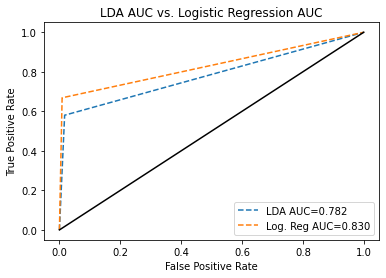

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate AUC for train and test data
da_auc_test = roc_auc_score(test_y, da_test_pred_class)
log_auc_test = roc_auc_score(test_y, log_test_pred_class)

# calculate fpr and tpr for logistic regression and linear discriminant analysis
da_fpr_test, da_tpr_test, _ = roc_curve(test_y, da_test_pred_class)
log_fpr_test, log_tpr_test, _ = roc_curve(test_y, log_test_pred_class)

# Plotting
plt.plot(da_fpr_test, da_tpr_test, linestyle='--', label="{}{:.3f}".format("LDA AUC=", da_auc_test))
plt.plot(log_fpr_test, log_tpr_test, linestyle='--', label="{}{:.3f}".format("Log. Reg AUC=", log_auc_test))
plt.plot([0, 1], [0, 1], linestyle='solid', c='k')

plt.title("LDA AUC vs. Logistic Regression AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()